# <b>Section 3: Data Modeling</b>

### <b><u>Step 0</u>: Download library for support</b>

In [ ]:
! pip install ipynb

### <b><u>Step 1</u>: Import library</b>

These are the main libraries used for data crawling:
- `sys`: Spotipy is a lightweight Python library for the Spotify Web API. With Spotipy you get full access to all of the music data provided by the Spotify platform.
- `numpy`: used to get spotipy's client_id, secret and redirect uri in .env file
- `pandas`: used to get accessed to .env files in system
- `matplotlib`: used to support write data to csv files
- `sklearn`: used to support write data to csv files

In [1]:
import sys
sys.path.insert(0, '../../data_exploration/components/')
sys.path.insert(0, '../../data')

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from ipynb.fs.full.songs_data_exploration import songs_df

In [101]:
songs_df.head()

,id,name,artist,genres,artist_followers,artist_popularity,markets,album,released_date,album_popularity,duration,popularity,main_genre,artists_count,year,month,cluster
0,1RDvyOk4WtPCtoqciJwVn8,Dreamers [Music from the FIFA World Cup Qatar ...,"[Jung Kook, BTS, FIFA Sound]","[k-pop boy group, k-pop]",58961886,100,183,Dreamers [Music from the FIFA World Cup Qatar ...,2022-11-20,81,201391,92,k-pop boy group,3,2022,11,1
1,6A1IbMKwjvXibcrU1sdqKH,Em Là,"[MONO, Onionn]",None,100162,77,182,22,2022-08-18,60,197333,62,None,2,2022,8,0
2,7bFFUPBiF15n8m8RziqS4o,dự báo thời tiết hôm nay mưa,[GREY D],[v-pop],39690,56,182,dự báo thời tiết hôm nay mưa – Maxi Single,2022-11-22,52,281493,62,v-pop,1,2022,11,0
3,4QjxvzEFwb63NZ1pp3wvHy,Chết Trong Em,[Thịnh Suy],"[vietnamese singer-songwriter, v-pop]",359817,54,183,Chết Trong Em,2022-10-31,50,256663,62,vietnamese singer-songwriter,1,2022,10,0
4,5p8ThxM2OhJ0igfxkz0Z1q,Wild Flower (with youjeen),[RM],[k-rap],12005881,81,183,Indigo,2022-12-02,85,273499,88,k-rap,1,2022,12,0


In [102]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 3000 non-null   object        
 1   name               3000 non-null   object        
 2   artist             3000 non-null   object        
 3   genres             3000 non-null   object        
 4   artist_followers   3000 non-null   int64         
 5   artist_popularity  3000 non-null   int64         
 6   markets            3000 non-null   int64         
 7   album              3000 non-null   object        
 8   released_date      3000 non-null   datetime64[ns]
 9   album_popularity   3000 non-null   int64         
 10  duration           3000 non-null   int64         
 11  popularity         3000 non-null   int64         
 12  main_genre         3000 non-null   object        
 13  artists_count      3000 non-null   int64         
 14  year    

In [112]:
recommend_df = songs_df[['artist_popularity', 'artists_count', 'year', 'month', 'main_genre']]
recommend_df.head()

,artist_popularity,artists_count,year,month,main_genre
0,100,3,2022,11,k-pop boy group
1,77,2,2022,8,None
2,56,1,2022,11,v-pop
3,54,1,2022,10,vietnamese singer-songwriter
4,81,1,2022,12,k-rap


In [113]:
recommend_df[['main_genre']].nunique()

main_genre    222
dtype: int64

In [114]:
genres_dict = {g: 0 for g in recommend_df['main_genre'].unique()}
idx = 0

for i,_ in genres_dict.items():
    genres_dict[i] = idx
    idx += 1

In [115]:
recommend_df['main_genre'] = recommend_df['main_genre'].map(genres_dict)
recommend_df.head()

,artist_popularity,artists_count,year,month,main_genre
0,100,3,2022,11,0
1,77,2,2022,8,1
2,56,1,2022,11,2
3,54,1,2022,10,3
4,81,1,2022,12,4


In [116]:
recommend_np = recommend_df.to_numpy()
recommend_np

array([[ 100,    3, 2022,   11,    0],
       [  77,    2, 2022,    8,    1],
       [  56,    1, 2022,   11,    2],
       ...,
       [  72,    1, 2020,   12,  111],
       [  79,    1, 2020,    7,  120],
       [ 100,    2, 2020,    9,   99]])

In [117]:
sum_distances = []
K = range(1,15)
for k in K:
  k_mean = KMeans(n_clusters=k)
  k_mean.fit(recommend_np)
  sum_distances.append(k_mean.inertia_)

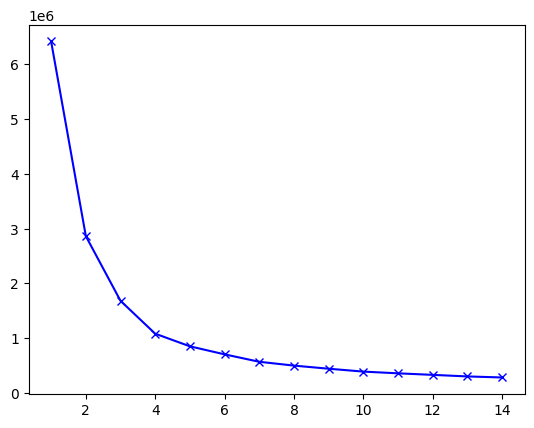

In [118]:
plt.plot(K, sum_distances, 'bx-')
plt.show()

In [119]:
k_mean_3 = KMeans(n_clusters=4)
model = k_mean_3.fit(recommend_np)
result = k_mean_3.labels_

In [120]:
metrics.silhouette_score(recommend_np, result, metric='euclidean')

0.5132165646191659

In [121]:
metrics.calinski_harabasz_score(recommend_np, result)

4909.522402149433

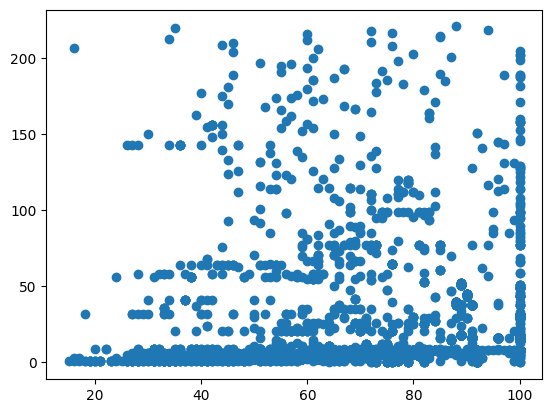

In [122]:
plt.scatter(recommend_np[:,0], recommend_np[:,-1])
plt.show()

/var/folders/m7/368g6v5d01g4x7brwcqrgvg40000gn/T/ipykernel_60176/2687906986.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


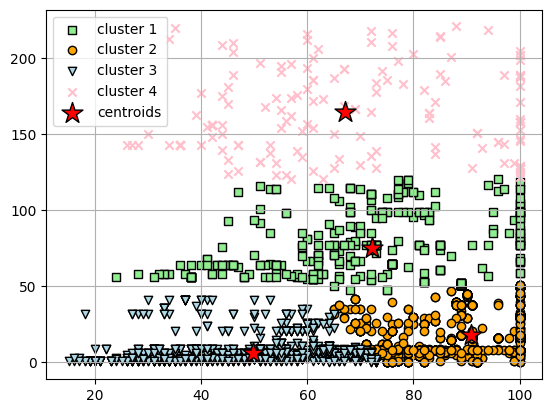

In [123]:
plt.scatter(
    recommend_np[result == 0, 0], recommend_np[result == 0, -1],
    c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    recommend_np[result == 1, 0], recommend_np[result == 1, -1],
    c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    recommend_np[result == 2, 0], recommend_np[result == 2, -1],
    c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    recommend_np[result == 3, 0], recommend_np[result == 3, -1],
    c='pink',
    marker='x', edgecolor='black',
    label='cluster 4'
)

plt.scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, -1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [124]:
recommend_np.shape

(3000, 5)

In [125]:
songs_df['cluster'] = result

In [126]:
recommend_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   artist_popularity  3000 non-null   int64
 1   artists_count      3000 non-null   int64
 2   year               3000 non-null   int64
 3   month              3000 non-null   int64
 4   main_genre         3000 non-null   int64
dtypes: int64(5)
memory usage: 140.6 KB


In [127]:
def recommend(model, art_pop, artist_count, year, month, main_genre):
  arr = np.array([[art_pop, artist_count, year, month, main_genre]])
  pred = model.predict(arr)
  return songs_df[songs_df['cluster'] == pred[0]].sample(5)

In [129]:
art_pop = 50
artist_count = 1
year = 2022
month = 12
main_genre = 'pop'
try:
    main_genre = genres_dict[main_genre]
except:
    for i,_ in genres_dict.items():
        if main_genre in i:
            main_genre = genres_dict[i]
            break

recommend(model, art_pop, artist_count, year, month, main_genre)

,id,name,artist,genres,artist_followers,artist_popularity,markets,album,released_date,album_popularity,duration,popularity,main_genre,artists_count,year,month,cluster
1727,3ga15nIuWQdS2kgerozfAu,Về Phía Mưa,[Thế Bảo & Hoàng Dũng],None,109,16,184,Tôi Đã Từng Như Thế,2021-12-15,33,349442,33,None,1,2021,12,2
1350,6MQ0GpN8UM4vXkz930q5UN,Thiên Thần Tình Yêu,"[Ricky Star, T.R.I]","[indie viet, vietnamese hip hop, v-pop, viet l...",132769,64,183,Thiên Thần Tình Yêu,2021-12-24,28,222439,39,indie viet,2,2021,12,2
1395,4RX020eHQpZbZFP5jpbwOP,Coping,[Rosie Darling],"[alt z, pop]",46197,62,183,Coping,2021-04-02,64,190266,69,alt z,1,2021,4,2
2410,7fBS3lMEHU3XIzn6lXgH3X,Chim Sẻ Và Dâu Tây (feat. Dế Choắt & Wowy),"[RAP VIỆT, Dế Choắt (DC), Wowy]","[vietnamese trap, vietnamese hip hop, v-pop, v...",954498,68,184,Rap Việt Tập 16,2020-11-16,39,207789,37,vietnamese trap,3,2020,11,2
2753,6S0uTVKBoXVC826jLqattP,Hãy Nói Đi,[Bệt Band],[indie viet],2062,22,184,Hãy Nói Đi,2020-04-10,21,256173,33,indie viet,1,2020,4,2
